In [ ]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

random_state = 42
n_jobs = 8

In [ ]:
sklearn.__version__

'1.1.3'

In [ ]:
path = ''

In [ ]:
coi_train_2010 = pd.read_csv(path+'data_cleaned/coi_district_grouped_train_2010.csv', index_col=0)
coi_train_2015 = pd.read_csv(path+'data_cleaned/coi_district_grouped_train_2015.csv', index_col=0)
coi_test_2010 = pd.read_csv(path+'data_cleaned/coi_district_grouped_test_2010.csv', index_col=0)
coi_test_2015 = pd.read_csv(path+'data_cleaned/coi_district_grouped_test_2015.csv', index_col=0)

In [ ]:
seda_train_2010 = pd.read_csv(path+'data_cleaned/seda_train_2010.csv', index_col=0)
seda_train_2015 = pd.read_csv(path+'data_cleaned/seda_train_2015.csv', index_col=0)
seda_test_2010 = pd.read_csv(path+'data_cleaned/seda_test_2010.csv', index_col=0)
seda_test_2015 = pd.read_csv(path+'data_cleaned/seda_test_2015.csv', index_col=0)

In [ ]:
#clusters_2010 = pd.read_csv(path+'data_cleaned/pca_with_coi_district_grouped_data_2010.csv')

In [ ]:
coi_train_2010.columns

Index(['LEAID', 'NAME_LEA15', 'year', 'pop_child', 'pop_total', 'pop_scaled',
       'ED_APENR', 'ED_ATTAIN', 'ED_COLLEGE', 'ED_ECENROL', 'ED_HSGRAD',
       'ED_MATH', 'ED_READING', 'ED_SCHPOV', 'ED_TEACHXP', 'ED_PRXECE',
       'ED_PRXHQECE', 'HE_FOOD', 'HE_GREEN', 'HE_HEAT', 'HE_HLTHINS',
       'HE_OZONE', 'HE_PM25', 'HE_VACANCY', 'HE_WALK', 'HE_SUPRFND', 'HE_RSEI',
       'SE_POVRATE', 'SE_PUBLIC', 'SE_HOME', 'SE_OCC', 'SE_MHE', 'SE_EMPRAT',
       'SE_JOBPROX', 'SE_SINGLE'],
      dtype='object')

In [ ]:
coi_train_2015.sample(10)

,LEAID,NAME_LEA15,year,pop_child,pop_total,pop_scaled,ED_APENR,ED_ATTAIN,ED_COLLEGE,ED_ECENROL,...,HE_SUPRFND,HE_RSEI,SE_POVRATE,SE_PUBLIC,SE_HOME,SE_OCC,SE_MHE,SE_EMPRAT,SE_JOBPROX,SE_SINGLE
6674,3616290,Kingston City School District,2015,12196,65182,48757.136514,-0.173540,-0.007099,0.785420,0.270751,...,-0.237684,-1.209251,-0.002945,0.442495,-0.249162,0.177414,-0.223367,0.140251,-0.167120,0.611811
7420,3904671,Central Local School District,2015,4141,16495,6480.493488,-1.064812,-0.695384,-0.776539,0.090538,...,-0.237684,0.608144,-0.561459,-0.594014,1.112889,-0.628138,-0.008395,0.534488,-0.535633,-0.363880
7648,3905059,Triway Local School District,2015,10132,38526,14988.878014,-0.399149,-0.545394,0.138146,-0.117212,...,-0.237684,0.694135,0.351504,0.336109,0.170317,-0.477178,-0.381820,0.128199,-0.494191,0.058290
10326,5306000,Oakville School District,2015,1683,7917,1444.199512,-1.330084,-0.790481,-1.595310,0.346525,...,-0.237684,-0.545599,0.160959,0.365842,0.627785,-0.409772,-0.333768,-1.181360,0.419152,0.164568
2138,1716140,Galva Community Unit School District 224,2015,2876,14893,4575.243744,-1.341426,-0.270366,-0.257704,0.313448,...,-0.237684,0.187220,-0.004550,-0.122365,0.524631,-0.165730,-0.559892,0.131282,-0.072121,-0.206358
8140,4103260,Clatskanie School District 6J,2015,2846,13446,3523.626870,-1.294695,-0.654012,-1.292824,0.094557,...,-0.237684,-0.050611,-0.005384,0.623843,0.563594,-0.775504,-0.351923,-1.376216,1.335394,0.059223
4604,2723490,New Ulm Public School District,2015,5316,25406,15824.771238,-0.653936,-0.290459,1.215927,-0.242363,...,-0.237684,-0.061580,-0.701515,-0.686865,0.679525,-0.314296,-0.030477,1.461601,-0.965952,-0.277805
8919,4701470,Greene County School District,2015,13575,68831,60301.362514,-0.693016,-0.762031,-0.631936,-0.549941,...,-0.237684,0.462934,0.210769,0.315382,0.340702,-0.587889,-0.795863,-0.527938,-0.466417,-0.052777
7730,4005160,Bowring Public School,2015,1570,7532,1551.993706,-0.409426,-0.200415,-0.981496,0.027058,...,-0.237684,-0.484947,-0.568997,-0.360644,0.707538,0.214413,-0.286428,-0.404447,-0.685404,-0.470139
2752,1810080,Seymour Community Schools,2015,8942,34750,27025.345392,0.182544,-0.577415,-1.713234,-0.028000,...,-0.237684,0.763568,0.124471,0.036148,0.136252,-0.568820,-0.389838,0.240357,-0.616196,-0.077520


In [ ]:
seda_train_2010.columns

Index(['fips', 'stateabb', 'sedalea', 'sedaleaname', 'subject', 'grade',
       'year', 'cs_mn_all', 'cs_mnse_all', 'totgyb_all', 'cs_mn_asn',
       'cs_mnse_asn', 'totgyb_asn', 'cs_mn_blk', 'cs_mnse_blk', 'totgyb_blk',
       'cs_mn_ecd', 'cs_mnse_ecd', 'totgyb_ecd', 'cs_mn_fem', 'cs_mnse_fem',
       'totgyb_fem', 'cs_mn_hsp', 'cs_mnse_hsp', 'totgyb_hsp', 'cs_mn_mal',
       'cs_mnse_mal', 'totgyb_mal', 'cs_mn_mfg', 'cs_mnse_mfg', 'totgyb_mfg',
       'cs_mn_mtr', 'cs_mnse_mtr', 'totgyb_mtr', 'cs_mn_nam', 'cs_mnse_nam',
       'totgyb_nam', 'cs_mn_nec', 'cs_mnse_nec', 'totgyb_nec', 'cs_mn_neg',
       'cs_mnse_neg', 'totgyb_neg', 'cs_mn_wag', 'cs_mnse_wag', 'totgyb_wag',
       'cs_mn_wbg', 'cs_mnse_wbg', 'totgyb_wbg', 'cs_mn_whg', 'cs_mnse_whg',
       'totgyb_whg', 'cs_mn_wht', 'cs_mnse_wht', 'totgyb_wht', 'cs_mn_wmg',
       'cs_mnse_wmg', 'totgyb_wmg', 'cs_mn_wng', 'cs_mnse_wng', 'totgyb_wng'],
      dtype='object')

In [ ]:
#clusters_2010.columns

Index(['LEAID', 'NAME_LEA15', 'year', 'pop_total', 'pop_child', 'ED_APENR',
       'ED_ATTAIN', 'ED_COLLEGE', 'ED_ECENROL', 'ED_HSGRAD', 'ED_MATH',
       'ED_READING', 'ED_SCHPOV', 'ED_TEACHXP', 'ED_PRXECE', 'ED_PRXHQECE',
       'HE_FOOD', 'HE_GREEN', 'HE_HEAT', 'HE_HLTHINS', 'HE_OZONE', 'HE_PM25',
       'HE_VACANCY', 'HE_WALK', 'HE_SUPRFND', 'HE_RSEI', 'SE_POVRATE',
       'SE_PUBLIC', 'SE_HOME', 'SE_OCC', 'SE_MHE', 'SE_EMPRAT', 'SE_JOBPROX',
       'SE_SINGLE', 'Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 4.1', 'Component 6', 'Component 7', 'Component 8',
       'Component 9', 'Component 10', 'Component 11',
       'Segment from k-means PCA'],
      dtype='object')

In [ ]:
def make_clusters(coi, n_clusters, drop_outliers=False):

    if drop_outliers:
        coi = coi[coi['pop_child'] < 550000]
    
    km_cols = ['pop_child', 'pop_total', 'pop_scaled', 
               'ED_APENR', 'ED_ATTAIN', 'ED_COLLEGE', 'ED_ECENROL', 'ED_HSGRAD',
               'ED_MATH', 'ED_READING', 'ED_SCHPOV', 'ED_TEACHXP', 'ED_PRXECE', 
               'ED_PRXHQECE', 'HE_FOOD', 'HE_GREEN', 'HE_HEAT', 'HE_HLTHINS',
               'HE_OZONE', 'HE_PM25', 'HE_VACANCY', 'HE_WALK', 'HE_SUPRFND', 'HE_RSEI',
               'SE_POVRATE', 'SE_PUBLIC', 'SE_HOME', 'SE_OCC', 'SE_MHE', 'SE_EMPRAT',
               'SE_JOBPROX', 'SE_SINGLE']
    
    km_df = coi.loc[:, km_cols]
    
    scaler = StandardScaler().fit(km_df.iloc[:, :3])
    km_df.iloc[:, :3] = StandardScaler().transform(km_df.iloc[:, :3])

    pca = PCA(n_components=11, random_state=random_state).fit(km_df)
    pca_arr = pca.transform(km_df)
        
    pca_df = pd.concat([coi.reset_index(drop = True), pd.DataFrame(pca_arr)],axis = 1)
    pca_df.columns.values[-11:] = ['Component 1','Component 2','Component 3','Component 4','Component 4','Component 6',
                                   'Component 7','Component 8','Component 9','Component 10','Component 11']

    kmeans = KMeans(n_clusters=n_clusters, n_init=20, algorithm='lloyd', max_iter=1000, random_state=random_state).fit(pca_arr)
    
    clusters = kmeans.predict(pca_arr)
    
    df = pd.concat([pca_df, pd.Series(clusters, name='cluster')], axis=1)
    
    return scaler, pca, kmeans, df


In [ ]:
def merge_data(coi, seda):
    df = coi.merge(seda, left_on='LEAID', right_on='sedalea')
    df = df.rename(columns={'year_x': 'coi_year', 'year_y': 'seda_year'})
    df = df.replace({'rla': 0, 'mth': 1})
    #print(train.shape)
    #print(train.columns)
    
    return df

In [ ]:
def select_cols_X_y(df, cluster=False, col='cs_mn_all'):
    description_cols = ['LEAID', 'NAME_LEA15', 'fips', 'stateabb', 'sedalea', 'sedaleaname']
                        
    all_cols = ['coi_year', 'pop_child', 'pop_total', 'pop_scaled',
                'ED_APENR', 'ED_ATTAIN', 'ED_COLLEGE', 'ED_ECENROL', 'ED_HSGRAD',
                'ED_MATH', 'ED_READING', 'ED_SCHPOV', 'ED_TEACHXP', 'ED_PRXECE',
                'ED_PRXHQECE', 'HE_FOOD', 'HE_GREEN', 'HE_HEAT', 'HE_HLTHINS',
                'HE_OZONE', 'HE_PM25', 'HE_VACANCY', 'HE_WALK', 'HE_SUPRFND', 'HE_RSEI',
                'SE_POVRATE', 'SE_PUBLIC', 'SE_HOME', 'SE_OCC', 'SE_MHE', 'SE_EMPRAT',
                'SE_JOBPROX', 'SE_SINGLE', 'subject', 'grade', 'seda_year']

    if cluster:
        all_cols.append('cluster')
        
    all_cols.append(col)
    
    y_col = col
    
    train = df[all_cols]
    train = train.dropna()
    X = train.iloc[:, :-1]
    y = train[y_col]
    
    desc_df = df[description_cols]
    
    return X, y, desc_df

In [ ]:
def fit_hgbr(df, cluster_num):
    if cluster_num:
        train_clust = df[df['cluster'] == cluster_num]
    else:
        train_clust = df.copy()

    X_df, y, desc = select_cols_X_y(train_clust, cluster=True, col='cs_mn_all')

    X = X_df.to_numpy()

    hgbr = HistGradientBoostingRegressor(learning_rate=1, max_depth=5, random_state=random_state)
    hgbr.fit(X, y)
    
    return hgbr.score(X, y)

# Models for 2010 Data

In [ ]:
train_2010 = merge_data(coi_train_2010, seda_train_2010)

X_df, y, desc = select_cols_X_y(train_2010, col='cs_mn_all')

X = X_df.to_numpy()

In [ ]:
train_2010.columns

Index(['LEAID', 'NAME_LEA15', 'coi_year', 'pop_child', 'pop_total',
       'pop_scaled', 'ED_APENR', 'ED_ATTAIN', 'ED_COLLEGE', 'ED_ECENROL',
       'ED_HSGRAD', 'ED_MATH', 'ED_READING', 'ED_SCHPOV', 'ED_TEACHXP',
       'ED_PRXECE', 'ED_PRXHQECE', 'HE_FOOD', 'HE_GREEN', 'HE_HEAT',
       'HE_HLTHINS', 'HE_OZONE', 'HE_PM25', 'HE_VACANCY', 'HE_WALK',
       'HE_SUPRFND', 'HE_RSEI', 'SE_POVRATE', 'SE_PUBLIC', 'SE_HOME', 'SE_OCC',
       'SE_MHE', 'SE_EMPRAT', 'SE_JOBPROX', 'SE_SINGLE', 'fips', 'stateabb',
       'sedalea', 'sedaleaname', 'subject', 'grade', 'seda_year', 'cs_mn_all',
       'cs_mnse_all', 'totgyb_all', 'cs_mn_asn', 'cs_mnse_asn', 'totgyb_asn',
       'cs_mn_blk', 'cs_mnse_blk', 'totgyb_blk', 'cs_mn_ecd', 'cs_mnse_ecd',
       'totgyb_ecd', 'cs_mn_fem', 'cs_mnse_fem', 'totgyb_fem', 'cs_mn_hsp',
       'cs_mnse_hsp', 'totgyb_hsp', 'cs_mn_mal', 'cs_mnse_mal', 'totgyb_mal',
       'cs_mn_mfg', 'cs_mnse_mfg', 'totgyb_mfg', 'cs_mn_mtr', 'cs_mnse_mtr',
       'totgyb_mtr', 'cs_m

In [ ]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [ ]:
lm.score(X, y)

0.5463261650119418

In [ ]:
lasso = Lasso(alpha=0.5, random_state=random_state)
lasso.fit(X, y)

Lasso(alpha=0.5, random_state=42)

In [ ]:
lasso.score(X, y)

0.0030928077588240344

In [ ]:
ridge = Ridge(alpha=1, random_state=random_state)
ridge.fit(X, y)

Ridge(alpha=1, random_state=42)

In [ ]:
ridge.score(X, y)

0.5463261649812814

In [ ]:
ridge = Ridge(alpha=0.8, random_state=random_state)
ridge.fit(X, y)

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10516e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.8, random_state=42)

In [ ]:
ridge.score(X, y)

0.5463261649923186

In [ ]:
ridge = Ridge(alpha=0.5, random_state=random_state)
ridge.fit(X, y)

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.90723e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.5, random_state=42)

In [ ]:
ridge.score(X, y)

0.5463261650042761

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=4, n_jobs=n_jobs, random_state=random_state)
rfr.fit(X, y)

RandomForestRegressor(max_depth=4, n_jobs=8, random_state=42)

In [ ]:
rfr.score(X, y)

0.5165457019823114

In [ ]:
rfr6 = RandomForestRegressor(n_estimators=100, max_depth=6, n_jobs=n_jobs, random_state=random_state)
rfr6.fit(X, y)

RandomForestRegressor(max_depth=6, n_jobs=8, random_state=42)

In [ ]:
rfr6.score(X, y)

0.5640143131932283

In [ ]:
rfr5 = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=n_jobs, random_state=random_state)
rfr5.fit(X, y)

RandomForestRegressor(max_depth=5, n_jobs=8, random_state=42)

In [ ]:
rfr5.score(X, y)

0.5415417329270719

In [ ]:
rfr7 = RandomForestRegressor(n_estimators=100, max_depth=7, n_jobs=n_jobs, random_state=random_state)
rfr7.fit(X, y)

RandomForestRegressor(max_depth=7, n_jobs=8, random_state=42)

In [ ]:
rfr7.score(X, y)

0.5860410672035221

In [ ]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=random_state)
gbr.fit(X, y)

GradientBoostingRegressor(random_state=42)

In [ ]:
gbr.score(X, y)

0.5961881094409593

In [ ]:
gbr2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=2, random_state=random_state)
gbr2.fit(X, y)

GradientBoostingRegressor(max_depth=2, random_state=42)

In [ ]:
gbr2.score(X, y)

0.572966581094313

In [ ]:
gbr2_5 = GradientBoostingRegressor(learning_rate=0.5, n_estimators=100, max_depth=2, random_state=random_state)
gbr2_5.fit(X, y)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, random_state=42)

In [ ]:
gbr2_5.score(X, y)

0.6035561223708383

In [ ]:
gbr2_1 = GradientBoostingRegressor(learning_rate=1, n_estimators=100, max_depth=2, random_state=random_state)
gbr2_1.fit(X, y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, random_state=42)

In [ ]:
gbr2_1.score(X, y)

0.6122038153360474

In [ ]:
gbr2_2 = GradientBoostingRegressor(learning_rate=2, n_estimators=100, max_depth=2, random_state=random_state)
gbr2_2.fit(X, y)

GradientBoostingRegressor(learning_rate=2, max_depth=2, random_state=42)

In [ ]:
gbr2_2.score(X, y)

3.3861802251067274e-14

In [ ]:
gbr2_15 = GradientBoostingRegressor(learning_rate=1.5, n_estimators=100, max_depth=2, random_state=random_state)
gbr2_15.fit(X, y)

GradientBoostingRegressor(learning_rate=1.5, max_depth=2, random_state=42)

In [ ]:
gbr2_15.score(X, y)

0.6068914014580025

# Models for 2015 Data

In [ ]:
train_2015 = merge_data(coi_train_2015, seda_train_2015)

X_df, y, desc = select_cols_X_y(train_2015, col='cs_mn_all')

X = X_df.to_numpy()

In [ ]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [ ]:
lm.score(X, y)

0.5513093996810483

In [ ]:
lasso = Lasso(alpha=0.5, random_state=random_state)
lasso.fit(X, y)

Lasso(alpha=0.5, random_state=42)

In [ ]:
lasso.score(X, y)

0.0025269158801806135

In [ ]:
ridge = Ridge(alpha=1, random_state=random_state)
ridge.fit(X, y)

Ridge(alpha=1, random_state=42)

In [ ]:
ridge.score(X, y)

0.5513093996509315

In [ ]:
rfr7 = RandomForestRegressor(n_estimators=100, max_depth=7, n_jobs=n_jobs, random_state=random_state)
rfr7.fit(X, y)

RandomForestRegressor(max_depth=7, n_jobs=8, random_state=42)

In [ ]:
rfr7.score(X, y)

0.6024387127866675

In [ ]:
gbr2_1 = GradientBoostingRegressor(learning_rate=1, n_estimators=100, max_depth=2, random_state=random_state)
gbr2_1.fit(X, y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, random_state=42)

In [ ]:
gbr2_1.score(X, y)

0.6212151719113779

# Multiple Models for 2010

In [ ]:
train_clust = merge_cluster(train_2010, clusters_2010)

X_df, y, desc = select_cols_X_y(train_clust, cluster=True, col='cs_mn_all')

X = X_df.to_numpy()

In [ ]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [ ]:
lm.score(X, y)

0.5466432042492448

In [ ]:
train_clust['cluster'].unique()

array([1, 2, 3, 0])

In [ ]:
def fit_lm(df, cluster_num):
    train_clust = df[df['cluster'] == cluster_num]

    X_df, y, desc = select_cols_X_y(train_clust, cluster=True, col='cs_mn_all')

    X = X_df.to_numpy()

    lm = LinearRegression()
    lm.fit(X, y)
    
    return lm.score(X, y)

In [ ]:
fit_lm(train_clust, 0)

0.5406872337789974

In [ ]:
fit_lm(train_clust, 1)

0.32420882070040213

In [ ]:
fit_lm(train_clust, 2)

0.5313396366968626

In [ ]:
fit_lm(train_clust, 3)

0.2137288284923078

In [ ]:
fit_hgbr(train_clust, 3)

0.5558594044049829

In [ ]:
fit_hgbr(train_clust, 0)

0.8690016893043733

# Clustered 2015 Models

In [ ]:
pca, kmeans, coi_train_clust_2015 = make_clusters(coi_train_2015, n_clusters=4, drop_outliers=False)
coi_train_clust_2015.groupby('cluster')['LEAID'].count()

(10847, 11)


cluster
0    4708
1    2535
2       4
3    3600
Name: LEAID, dtype: int64

In [ ]:
coi_train_clust_2015[coi_train_clust_2015['cluster'] == 2].iloc[:, :6]

,LEAID,NAME_LEA15,year,pop_child,pop_total,pop_scaled
936,622710,Los Angeles Unified School District,2015,1085808,4793985,4.541622e+06
1590,1200390,Dade County School District,2015,553299,2496435,2.496435e+06
2038,1709930,Chicago Public School District 299,2015,595956,2735079,2.697662e+06
6756,3620580,New York City Department Of Education,2015,1794644,8175133,8.175133e+06


In [ ]:
coi_train_clust_2015[coi_train_clust_2015['pop_child'] > 550000]

,LEAID,NAME_LEA15,year,pop_child,pop_total,pop_scaled,ED_APENR,ED_ATTAIN,ED_COLLEGE,ED_ECENROL,...,Component 3,Component 4,Component 4,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,cluster
936,622710,Los Angeles Unified School District,2015,1085808,4793985,4.541622e+06,0.588839,0.019934,0.779780,0.351197,...,32.231913,13.209856,5.718974,1.276178,1.339699,1.573034,2.305003,-1.691453,0.615842,2
1590,1200390,Dade County School District,2015,553299,2496435,2.496435e+06,0.900277,-0.036666,0.673132,0.463831,...,17.532009,4.734271,3.384824,0.375459,2.036800,0.380453,1.134530,-0.535350,-0.263975,2
2038,1709930,Chicago Public School District 299,2015,595956,2735079,2.697662e+06,0.391746,0.334433,0.280761,0.398951,...,16.469000,6.542677,3.820519,-0.544804,1.457058,0.831866,1.555259,-0.166241,0.833329,2
6756,3620580,New York City Department Of Education,2015,1794644,8175133,8.175133e+06,0.017234,0.376310,0.022077,0.560500,...,58.549176,23.878755,11.163904,0.244739,3.622113,2.886374,5.074701,0.506459,-0.207509,2


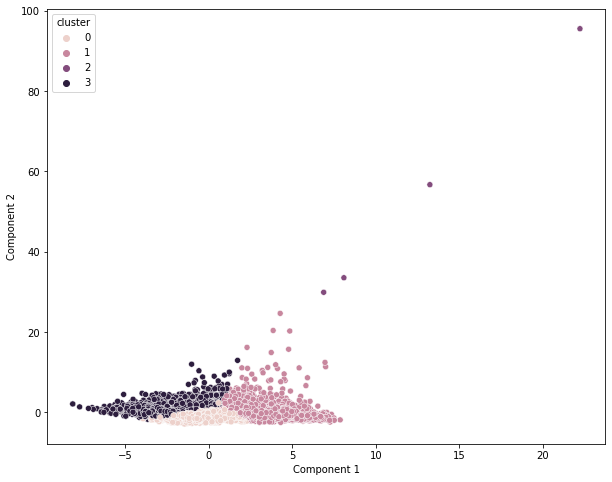

In [ ]:
#plot the segments on the first two princial components
x_axis = coi_train_clust_2015['Component 1']
y_axis = coi_train_clust_2015['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=coi_train_clust_2015['cluster'])
plt.show()

In [ ]:
train_2015 = merge_data(coi_train_clust_2015, seda_train_2015)

X_df, y, desc = select_cols_X_y(train_2015, cluster=True, col='cs_mn_all')

X = X_df.to_numpy()

In [ ]:
train_2015.columns

Index(['LEAID', 'NAME_LEA15', 'coi_year', 'pop_child', 'pop_total',
       'pop_scaled', 'ED_APENR', 'ED_ATTAIN', 'ED_COLLEGE', 'ED_ECENROL',
       ...
       'totgyb_whg', 'cs_mn_wht', 'cs_mnse_wht', 'totgyb_wht', 'cs_mn_wmg',
       'cs_mnse_wmg', 'totgyb_wmg', 'cs_mn_wng', 'cs_mnse_wng', 'totgyb_wng'],
      dtype='object', length=108)

In [ ]:
train_2015.groupby('cluster')['LEAID'].count()

cluster
0    100357
1     53972
2        80
3     85400
Name: LEAID, dtype: int64

In [ ]:
fit_hgbr(train_2015, 0)

0.7679420665030434

In [ ]:
fit_hgbr(train_2015, 1)

0.8747531032477158

In [ ]:
fit_hgbr(train_2015, 2)

0.9405686496302906

In [ ]:
fit_hgbr(train_2015, 3)

0.7335767217778608

In [ ]:
fit_hgbr(train_2015, None)

0.7679420665030434

In [ ]:
hgbr_13 = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=4, random_state=random_state)
hgbr_13.fit(X, y)

hgbr_13.score(X, y)

0.6269996185264248

In [ ]:
p_grid = {'learning_rate': [0.1, 0.5, 1, 1.5, 2], 'max_depth': [1, 2, 3, 4, 5]}
hgrb = HistGradientBoostingRegressor()

cv_best = {}

# Loop for each trial
for i in range(5):
    clf = GridSearchCV(estimator=hgrb, param_grid=p_grid, scoring=['r2', 'mean_absolute_error'], cv=5, n_jobs=n_jobs)
    clf.fit(X, y)
    cv_best[i] = (clf.best_score_, clf.best_params_)

cv_best

{0: (0.520254316241726, {'learning_rate': 0.1, 'max_depth': 3}),
 1: (0.5223414376364287, {'learning_rate': 0.1, 'max_depth': 4}),
 2: (0.5220580282194127, {'learning_rate': 0.1, 'max_depth': 4}),
 3: (0.5213955926977436, {'learning_rate': 0.1, 'max_depth': 5}),
 4: (0.5222390559825708, {'learning_rate': 0.1, 'max_depth': 4})}

In [ ]:
hgbr = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=4, random_state=random_state)
hgbr.fit(X, y)

HistGradientBoostingRegressor(max_depth=4, random_state=42)

In [ ]:
km_cols = ['pop_child', 'pop_total', 'pop_scaled', 
           'ED_APENR', 'ED_ATTAIN', 'ED_COLLEGE', 'ED_ECENROL', 'ED_HSGRAD',
           'ED_MATH', 'ED_READING', 'ED_SCHPOV', 'ED_TEACHXP', 'ED_PRXECE', 
           'ED_PRXHQECE', 'HE_FOOD', 'HE_GREEN', 'HE_HEAT', 'HE_HLTHINS',
           'HE_OZONE', 'HE_PM25', 'HE_VACANCY', 'HE_WALK', 'HE_SUPRFND', 'HE_RSEI',
           'SE_POVRATE', 'SE_PUBLIC', 'SE_HOME', 'SE_OCC', 'SE_MHE', 'SE_EMPRAT',
           'SE_JOBPROX', 'SE_SINGLE']

km_df = coi_test_2015.loc[:, km_cols]

km_df.iloc[:, :3] = StandardScaler().fit_transform(km_df.iloc[:, :3])

pca_arr = pca.transform(km_df)

pca_df = pd.concat([coi_test_2015.reset_index(drop = True), pd.DataFrame(pca_arr)],axis = 1)
pca_df.columns.values[-11:] = ['Component 1','Component 2','Component 3','Component 4','Component 4','Component 6',
                               'Component 7','Component 8','Component 9','Component 10','Component 11']

clusters = kmeans.fit_predict(pca_arr)

coi_test_clust_2015 = pd.concat([pca_df, pd.Series(clusters, name='cluster')], axis=1)

test_2015 = merge_data(coi_test_clust_2015, seda_test_2015)

X_test_df, y_test, desc_test = select_cols_X_y(test_2015, cluster=True, col='cs_mn_all')

X_test = X_test_df.to_numpy()

(2712, 11)


In [ ]:
hgbr.score(X_test, y_test)

0.5489513700827036